# Week 11 Section: Principal Components and Dimensionality Reduction 
#### Danylo Lavrentovich 11/20/19, thanks to Dan Greenfield (11/10/19), Verena Volf, and James Xue

## Case example: MNIST data

- Here we will use PCA to analyze handwritten digits and remove noise
- For the homework, we'd like you to use singular value decomposition (SVD) to compute principal components, project data, reconstruct data, etc. 
- This notebook uses canned functions from the `sklearn` PCA tool, so you can use this to practice using the outputs from SVD to match the outputs of the provided canned PCA functions

The demonstration here is adapted from the Python Datascience handbook https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

Some other good resources:
- Textbook on linear algebra: Introduction to Linear Algebra by Gilbert Strang
- Connections between PCA and SVD: https://intoli.com/blog/pca-and-svd/
- SVD: http://gregorygundersen.com/blog/2018/12/10/svd/

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects

from IPython.display import HTML, Image
from sklearn.datasets import load_digits

Load the data:

In [2]:
MNIST_DIGITS = load_digits()
X = MNIST_DIGITS.data
true_labels = MNIST_DIGITS.target
n, p = X.shape
n, p

(1797, 64)

The data set we are analyzing contains a total of 1797 hand written digits, where each digit is comprised of 64 pixels. 

The $(i, j)$'th entry of `X` is the greyscale intensity of digit $i$ at pixel $j$.

In [3]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

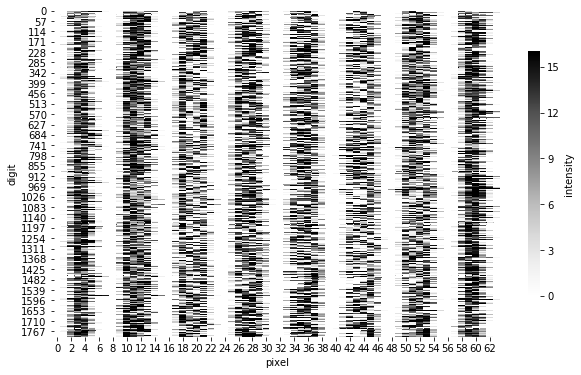

In [4]:
max_intensity, min_intensity = np.max(X), np.min(X)

plt.figure(figsize=(10,6))
sns.heatmap(X, 
            cmap='Greys', vmin=min_intensity, vmax=max_intensity, 
            cbar_kws={'label': 'intensity', 'shrink': 0.75})
plt.xlabel('pixel'); plt.ylabel('digit')
plt.show()

If we were interested in doing PCA on this data, in finding the "directions" in pixel-space that maximally explain the variation among the $n$ digits, then we can throw out a fair number of pixels right away -- pixel 0, pixel 8, etc., which are just 0s for every digit. If we knew that some datapoint's pixel 8 had intensity 0, that tells us nothing useful. But, if we knew what a digit's intensity was at, say, pixel 35, perhaps that would be informative.

Carrying on with looking at the data, here's the first digit, at the first row:

In [5]:
dig0 = X[0, :]
dig0

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

These are 64 pixels written all in one row. 

Let's reshape it to an 8 x 8 array and color each pixel by the intensity:

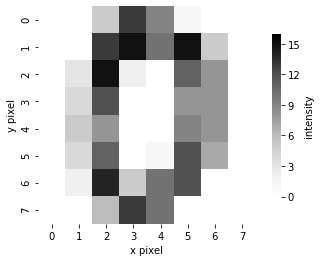

In [6]:
dig0_square = dig0.reshape((8, 8))

plt.figure()
plt.axis('square')
sns.heatmap(dig0_square, 
            cmap='Greys', vmin=min_intensity, vmax=max_intensity, 
            cbar_kws={'label': 'intensity', 'shrink': 0.75})
plt.xlabel('x pixel'); plt.ylabel('y pixel')
plt.show()

Looks like a 0! 

Now here's the first 40 images, but with a simpler plot for each hand-drawn digit (using `imshow`, which actually can plot any image via an array of grayscale or RGB pixels):

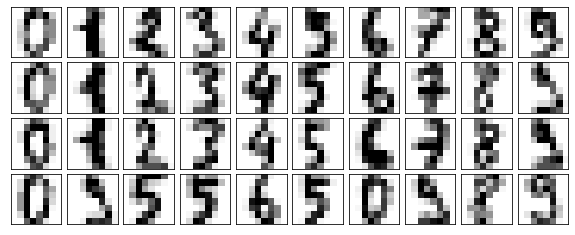

In [7]:
fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(X[i, :].reshape(8, 8), cmap='Greys')

Now we will do PCA on our `X` matrix using the canned `PCA` package from `scikit-learn`.

In [8]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

On your HW, we want you to arrive at principal components using SVD, because look at how boring and uninformative the above lines are. 

Use this jupyter notebook to mimic the canned functions in PCA using the appropriate matrix operations with $U$, $S$, $W$ from running SVD, since you'll need to do that on your HW.

Here's what you'll need to get started:

In [9]:
## TODO FOR YOU
# U, S, WT = np.linalg.svd(?)

Now, let's visit some of the use cases discussed in lecture.

## "scores": plotting data into lower-dimensional PC space

Our original data is 64-dimensional, since we have a 8x8 pixel grid for each digit. 

We hinted earlier at the fact that some pixels are totally uninformative (the white bands in the first heatmap above). 

How low can we go? Let's see what fraction of variance is captured by PC1, PC2, etc.

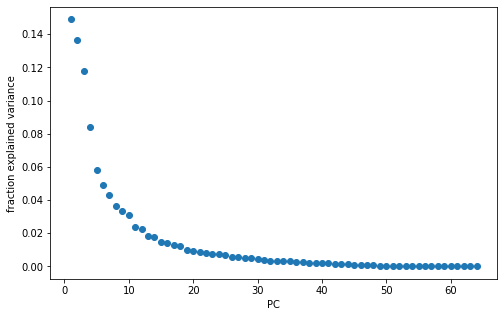

In [10]:
plt.figure(figsize=(8,5))
plt.plot(1+np.arange(p), pca.explained_variance_ratio_, 'o')
plt.xlabel('PC'); plt.ylabel('fraction explained variance')
plt.show()

It looks like the first PC captures about 15% of the variance in the data, the second PC about 14%. Components 50-64 contribute virtually nothing.

In [11]:
## TODO FOR YOU
## get the fraction of variance captured by each PC starting with the S array.
## it should equal pca.explained_variance_ratio!!

explained_variances_from_svd = 'insert code here'

In [12]:
# BONUS TODO FOR YOU
# use np.cumsum to find how many PCs we'd need to include to capture 95% of the variance

Now let's actually plot the data into a low-dimensional PC space, like two dimensions.

In [13]:
data_projections = pca.fit_transform(X)

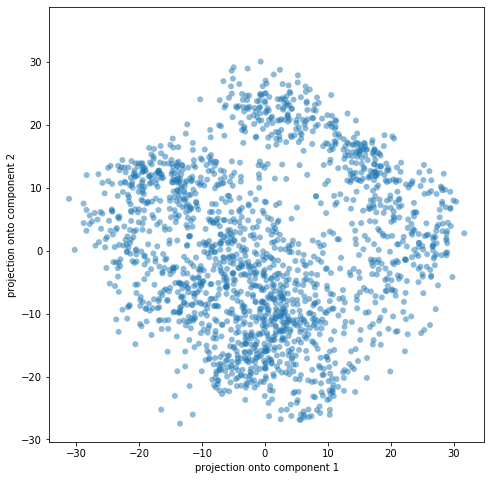

In [14]:
cmap = plt.cm.get_cmap('jet', 10)
projections_2d = data_projections[:, :2]

plt.figure(figsize=(8,8))
plt.scatter(projections_2d[:, 0], projections_2d[:, 1], edgecolor='none', alpha=0.5)
plt.xlabel('projection onto component 1'); plt.ylabel('projection onto component 2')
plt.axis('square')
plt.show()

Each dot on this plot is a particular datapoint (a digit), and its (x,y) position is (the digit's projection onto PC1, the digit's projection onto PC2).

The MNIST dataset provides true labels too. We know if the handdrawn digit is really 0, 1, ..., 9. So now let's color points by their true digit label. For each digit, I will also take all the datapoints that truly belong to the digit, take their centroid in this PC space, and give a text label.

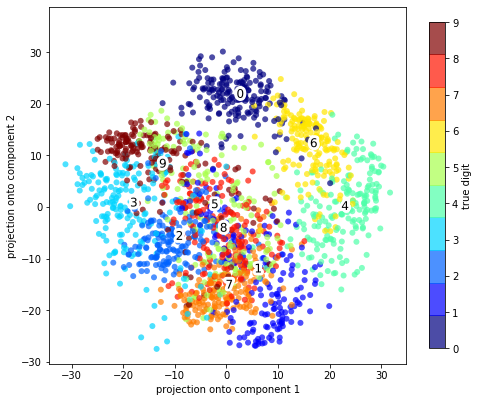

In [15]:
cmap = plt.cm.get_cmap('jet', 10)

plt.figure(figsize=(8,8))
# scatter plot as before, but colored by true label
plt.scatter(projections_2d[:, 0], projections_2d[:, 1],
            c=true_labels, edgecolor='none', alpha=0.7,
            cmap=cmap)

# add text label 0-9 to the centroid of each digit cluster
for digit in np.arange(10):
    where_digit = np.where(true_labels == digit)
    projections_subset = projections_2d[where_digit]
    centroid = np.mean(projections_subset, 0)
    # add white stroke to text, thanks to:
    # https://osxastrotricks.wordpress.com/2014/12/02/add-border-around-text-with-matplotlib/
    txt = plt.text(*centroid, digit, c='k', size=12)
    txt.set_path_effects([PathEffects.withStroke(linewidth=6, foreground='w')])

plt.xlabel('projection onto component 1'); plt.ylabel('projection onto component 2')
plt.colorbar(shrink=0.75, label='true digit')
plt.axis('square')
plt.show()

We see some structure here! 

For instance, all of the digits that are truly 0 seem to cluster together in this PC space. The next nearest cluster of points appears to be the 6's -- not surprising, those are curvy too. 

What else do you see here?

In [16]:
projections_onto_PC1 = data_projections[:, 0]

## TODO FOR YOU
## get the projections onto PC 1 using the appropriate information from U, S, W^T.
## your array should be pretty similar to the above projections_onto_PC1

projections_onto_PC1_from_svd = 'insert code here'

# check they're similar
#plt.figure()
#plt.scatter(projections_onto_PC1, projections_onto_PC1_from_svd)
#plt.show()

## "loadings": which variables are most important

Now let's take the first principal component and plot the entries of it. This gives a look into the contribution of each dimension into the direction that we know explains the most variation among the hand-drawn digit datapoints.

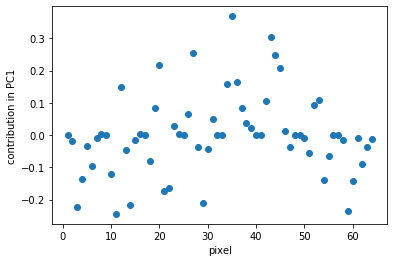

In [17]:
PC1 = pca.components_[0, :]

plt.figure()
plt.plot(1+ np.arange(p), PC1, 'o')
plt.xlabel('pixel'); plt.ylabel('contribution in PC1')
plt.show()

A lot of pixels have a contribution of around 0 in this PC, so they're not contributing much in this "direction" that we know explains a sizable fraction of the variance in the data.

I will arrange the first PC into an 8x8 grid and then color each entry just to make it easier to look at/think about in context of the 8x8 images, but remember that this whole time, the dimensionality of the data is 64 pixels.

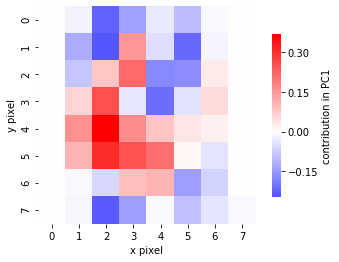

In [18]:
plt.figure()
plt.axis('square')
sns.heatmap(PC1.reshape((8, 8)), 
            cmap='bwr', center=0,
            cbar_kws={'label': 'contribution in PC1', 'shrink': 0.75})
plt.xlabel('x pixel'); plt.ylabel('y pixel')
plt.show()

In [19]:
## TODO FOR YOU
## get the entries of PC 1 using the appropriate information from U, S, W^T.
## it should be pretty similar to the above PC1

PC1_from_svd = 'insert code here'

Let's take such a look at the first 10 eigenvectors, where a color of red indicates a positive contribution in the PC, a color of blue a negative contribution, white = 0:

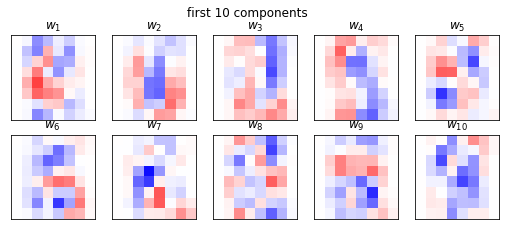

In [20]:
n_rows = 2
n_cols = 5

n_to_show = n_rows * n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(1.75*n_cols, 1.75*n_rows),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.2))

plt.suptitle(f'first {n_to_show} components')
for i in range(n_to_show):
    subplot_row = i // n_cols
    subplot_col = i % n_cols
    cur_ax = axes[subplot_row, subplot_col]
    cur_ax.set_title('$w_{'+f'{i+1}'+'}$')
    cur_ax.imshow(pca.components_[i, :].reshape((8,8)), cmap='bwr', vmin=-0.5, vmax=0.5)

- The first component seems to have large positive weights on pixels in the middle-left ish part of the grid. If we look at the projections of the digits onto the first PC (the value along the x axis in the plot we made earlier), digits with a large projection onto PC1 should have a lot of intensity in those red pixels in the left of the grid. Does it make sense that 4s have a large projection onto this PC, while 3s do not? It can help to think of "projection onto" as "overlap with"
- The second component seems to represent something like curviness along the bottom right and middle left. Does it make sense that 0s would score highly on this PC, but that 7s score very lowly?

## "reconstruction": denoising data

For each digit, we will take its projection onto each of the principal components, then we will re-express the original digit in the basis of the principal components. In other words, we'll express a digit like 

```
reconstructed data = 
    (pixel-wise mean) 
    + (centered data's projection onto PC1) * PC1 
    + (centered data's projection onto PC2) * PC2 
    + ... 
    + (centered data's projection onto PC8) * PC8
```

C:\Users\dB\Anaconda3\envs\py3p6\lib\site-packages\ipykernel_launcher.py:41: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


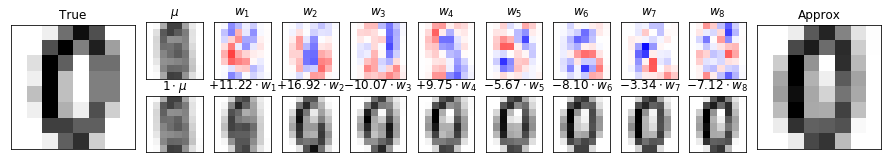

In [21]:
def plot_pca_components(x, coefficients=None, mean=0, components=None,
                        imshape=(8, 8), n_components=8, fontsize=12,
                        show_mean=True):
    '''
    a purposefully obtuse function
    '''
    if coefficients is None:
        coefficients = x
        
    if components is None:
        components = np.eye(len(coefficients), len(x))
        
    mean = np.zeros_like(x) + mean
        

    fig = plt.figure(figsize=(1.2 * (5 + n_components), 1.2 * 2))
    g = plt.GridSpec(2, 4 + bool(show_mean) + n_components, hspace=0.3)

    def show(i, j, x, title=None, cmap='binary', vmin=0, vmax=16):
        ax = fig.add_subplot(g[i, j], xticks=[], yticks=[])
        ax.imshow(x.reshape(imshape), interpolation='nearest', 
                  cmap=cmap, vmin=vmin, vmax=vmax)
        if title:
            ax.set_title(title, fontsize=fontsize)

    show(slice(2), slice(2), x, "True")
    
    approx = mean.copy()
    
    counter = 2
    if show_mean:
        show(0, 2, np.zeros_like(x) + mean, r'$\mu$')
        show(1, 2, approx, r'$1 \cdot \mu$')
        counter += 1

    for i in range(n_components):
        approx = approx + coefficients[i] * components[i]
        show(0, i + counter, components[i], 
             r'$w_{0}$'.format(i + 1), cmap='bwr', vmin=-0.5, vmax=0.5)
        show(1, i + counter, approx,
             r"${}{:.2f} \cdot w_{}$".format('+'*(coefficients[i]>0), coefficients[i], i + 1))

    show(slice(2), slice(-2, None), approx, "Approx")
    return fig

Xproj = pca.fit_transform(X)[:, :8]
fig = plot_pca_components(X[10], Xproj[10],
                          pca.mean_, pca.components_)

The panel on the left is the true image. The panel on the right is the image upon reconstruction using the first eight principal components. Notice that the mean, $\mu$, is added first since in the original data matrix, we subtracted the column means from the data, we need to add it back to reconstruct the data. The first row represents the eigenvectors.  $w_i$ represents the $i$th column of the eigenvector matrix $W$. The row in the middle shows the incremental sum of including each eigenvector multiplied by the projection of the digit onto that eigenvector. 

We can kind of tell it's a 0 already by adding in the second component, which adds curviness on the bottom right and middle left.

Another way that PCA can be used is to remove noise from lower dimensions. Let's add random noise to the handwritten digits data, keep the top 8 principal components, then reconstruct the data.

C:\Users\dB\Anaconda3\envs\py3p6\lib\site-packages\ipykernel_launcher.py:41: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


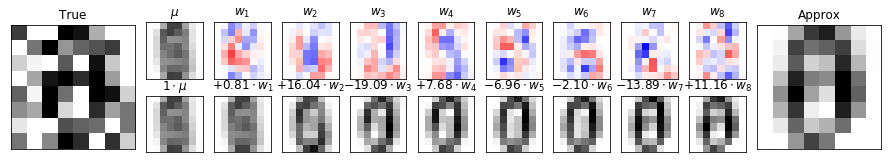

In [22]:
np.random.seed(123)
X_noisy = np.random.normal(X, scale=8)

Xproj_noisy = pca.transform(X_noisy)[:, :8]
fig = plot_pca_components(X_noisy[10], Xproj_noisy[10],
                          pca.mean_, pca.components_)

Wow, when we take a super noise-corrupted digit, and we subtract out the pixel means (computed from the original set of digits), then project the (centered) noisy digit onto the space spanned by the eight PCs trained on our original set, and reconstruct the digit, we can remove a lot of the noise and squint at it to say it's a 0 (well, maybe an 8).

In [23]:
## TODO FOR YOU
## use the information in U, S, W to project the following mystery digit to the first 8 PCs of the original data, X

noisy_mystery_digit = np.array([-2.85, -4.32,  5.46, 15.34, 15.38, -2.84,  2.08, -1.01,  2.  ,
        0.38, 20.61, 16.65, 13.62, 14.5 ,  3.3 , -6.98, -0.  ,  1.93,
       12.97,  0.19, 11.02, 17.6 , -1.49,  5.81, -0.23,  7.59, 12.79,
       15.48, 15.34, 19.05, -3.87, -4.03, -4.9 , -2.48, -1.91,  7.96,
       12.04, 15.41,  1.57,  8.29,  5.62, -2.06, -6.38,  3.3 ,  2.42,
       14.37,  0.83,  1.49, -4.83,  1.5 , -0.54,  8.96,  1.41, 17.34,
        3.8 , -4.1 ,  1.34, -5.24, 15.96, 13.23, 15.48,  6.64, -0.93,
       -0.38])

## code scaffold supplied here
noisy_digit_centered = ''
q = 8
Wq = ''
projection_onto_Wq = ''
reconstructed_noisy_digit = ''

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(7,3),
                        subplot_kw={'xticks':[], 'yticks':[]})
axs[0].set_title('noisy digit')
axs[0].imshow(noisy_mystery_digit.reshape((8,8)), cmap='binary', vmin=0, vmax=16)
axs[1].set_title(f'reconstructed noisy digit\nwith {q} components')
axs[1].imshow(reconstructed_noisy_digit.reshape((8,8)), cmap='binary', vmin=0, vmax=16)
plt.show()